# Text extraction


In [ ]:
# importing libraries
import requests

Here we will use tesseract for text extration

In [ ]:
# Download the tesseract file

req = requests.get('https://raw.githubusercontent.com/tesseract-ocr/tessdata/4.00/ind.traineddata')


In [ ]:
# now move data to a file
with open("/usr/share/tesseract-ocr/4.00/tessdata/ind.traineddata", "wb") as file:
  for block in req.iter_content(chunk_size = 1024): #iter_content() is a method that returns chunks of the response content.
    if block:                                 # chunk_size = 1024 bytes at a time
      file.write(block)

In [ ]:
# Lets install required libraries for tesseract
!apt install tesseract-ocr libtesseraact-dev libmagicwand-dev

# Importing Ipython to clear output which is not important
from IPython.display import HTML, clear_output
clear_output()

In [ ]:
# Istalling pytesseract and opencv and wand

!pip install pytesseract wand opencv-python
clear_output()

'''The pytesseract library is used for Optical Character Recognition (OCR) in Python.
 It provides a simple interface for extracting text from images or scanned documents.
 On the other hand, the wand library is a Python binding for ImageMagick, which allows you to create,
  edit, compose, or convert bitmap images. When used together,
  pytesseract can be used to extract text from images,
  and wand can be used to manipulate the images before performing OCR, such as resizing, enhancing,
   or converting them to a format suitable for OCR.'''

'The pytesseract library is used for Optical Character Recognition (OCR) in Python.\n It provides a simple interface for extracting text from images or scanned documents.\n On the other hand, the wand library is a Python binding for ImageMagick, which allows you to create,\n  edit, compose, or convert bitmap images. When used together,\n  pytesseract can be used to extract text from images,\n  and wand can be used to manipulate the images before performing OCR, such as resizing, enhancing,\n   or converting them to a format suitable for OCR.'

In [ ]:
!sudo apt-get install tesseract-ocr
clear_output()

In [ ]:
#REQUIRED LIBRARIES

from PIL import Image
import pytesseract
import cv2
import numpy as np
from pytesseract import Output
import re

In [ ]:
# lets read file
image = Image.open(requests.get('https://i.stack.imgur.com/pbIdS.png',stream = True).raw)
image = image.resize((300,200))
image.save('sample.png')
image

In [ ]:

# Specify the Tesseract executable path
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'


In [ ]:
# Simply extracting text from image
custom_config = r'-l eng --oem 3 --psm 6'
text = pytesseract.image_to_string(image,config=custom_config)
print(text)
#The -l flag specifies the language ('eng' for English), --oem specifies the OCR Engine Mode (in this case, mode 3), and --psm specifies the Page Segmentation Mode (in this case, mode 6).

Normal text and bold text

Italic text and bold italic text

Normal text and artificially bold text
Artificially outlined text

Artificially italic text and bold italic text



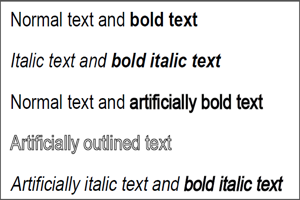

In [ ]:
image

Now cleaing the image removing unwanted symbols

In [ ]:
try:
  text = pytesseract.image_to_string(image,lang = 'eng')
  character_to_remove = '!()@-*">+_/,|#%$~^_&'
  new_string = text
  for character in character_to_remove:
    new_string = new_string.replace(character,'')

  print(new_string)
except IOError as e:
  print("Error (%s)." % e)

 

 

Normal text and bold text

Italic text and bold italic text

Normal text and artificially bold text
Artificially outlined text

Artificially italic text and bold italic text

 

 



In [ ]:
# now we will open file in opencv for further processing
image = cv2.imread('/content/sample.png')

## Data preprocessing

Converting image to grayscale so that it becomes leass complex to process. We will use cv2.cvtColor() method to convert an image from one color to another color space.more that 150 color conversion

In [ ]:
def get_grayscale(image):
  return cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray = get_grayscale(image)
print(gray)

[[ 85  79  79 ...  79  79  85]
 [ 96 147 149 ... 149 147  96]
 [113 255 255 ... 255 255 113]
 ...
 [112 254 255 ... 255 254 112]
 [109 231 234 ... 234 231 109]
 [ 87  90  90 ...  90  90  87]]


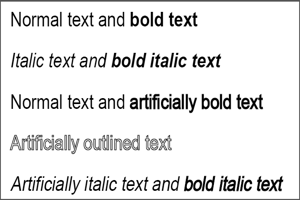

In [ ]:
Image.fromarray(gray)

Lets remove noise from image, here we will blur the image so we can remove the noise from the image. We will use cv2.medianBlur() method that computes the median of all pixels under the kernel window and the central pixel is replaced with this median value.\
Highly effectivei in removing noise

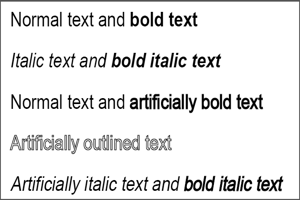

In [ ]:
# noise removal
def remove_noise(image):
  return cv2.medianBlur(gray,5)


noise = remove_noise(gray)
Image.fromarray(noise)

here we will perfrom threshold transformation, if pixel value greater then threshold value, it is assigned one value(may be white), else assigned another value.It is used to segment an image into regions or objects of interest by converting it into a binary image

In [ ]:
# Thresholding
def thresholding(image):
  return cv2.threshold(image,0,255)

 **Erode transformation** ,erosion\
 erode methos is used to perform erosion on the image.It erodes away the boundaries of foreground object.Normally performed on binary image.
 it takes 2 input one is our orignal image ,sexond one is called structuring element or kernel which decides the nature of operation.\
 Always try to keep background white.


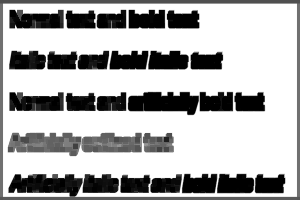

In [ ]:
def erosion(image):
  kernel = np.ones((5,5),np.uint8)
  return cv2.erode(image,kernel,iterations=1)

erosion = erosion(gray)
Image.fromarray(erosion)

array([[ 85,  79,  79, ...,  79,  79,  85],
       [ 96, 147, 149, ..., 149, 147,  96],
       [113, 255, 255, ..., 255, 255, 113],
       ...,
       [112, 254, 255, ..., 255, 254, 112],
       [109, 231, 234, ..., 234, 231, 109],
       [ 87,  90,  90, ...,  90,  90,  87]], dtype=uint8)
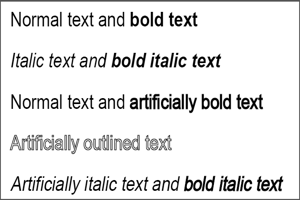

In [ ]:
gray

**Morphology**\
will perform morphological trasformation .It is useful in opening small holes inside the forground object or small white points on the object

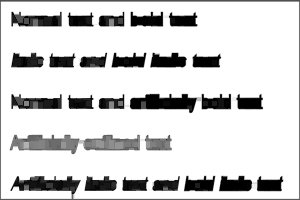

In [ ]:
def morpho(image):
  kernel = np.ones((5,5),np.uint8)
  return cv2.morphologyEx(image, cv2.MORPH_OPEN,  kernel)
opening = morpho(gray)
Image.fromarray(opening)

Canny edge detection \
used to detect the edges in image

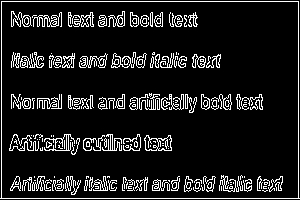

In [ ]:
def canny(image):
  return cv2.Canny(image, 100 ,200)

canny = canny(gray)
Image.fromarray(canny )

Skew Correction

deskewing an image is a process where skew is removed by rotating an image by the same amount as its skew but in the opposite direction. This results a horizontally and vertically alligned image where the text rus across the page rather than at an angle.

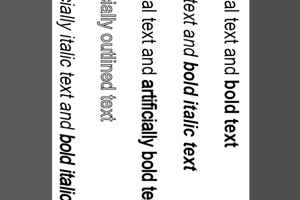

In [ ]:
# skew correction
def deskew(image):
  # first identifies the coordinates of the non-zero (foreground) pixels in the input image where the pixel intensity is greater than 0.
  #These coordinates are stored in the coords variable.
  coords = np.column_stack(np.where(image>0))

  #  calculates the minimum bounding rectangle (minAreaRect) around the identified coordinates.
  angle = cv2.minAreaRect(coords)[-1]

  #extracts the angle of rotation (angle) from the bounding rectangle. If the angle is less than -45 degrees,
  # it adjusts the angle to be -(90+angle), otherwise it just negates the angle.

  if angle <-45:
    angle = -(90+angle)
  else:
    angle = -angle

  (h,w) = image.shape[:2]
  center = (w//2,h//2)

  M = cv2.getRotationMatrix2D(center, angle, 1.0)

  # applies the rotation transformation to the input image using the cv2.warpAffine function, which performs an affine transformation on the image
  #based on the rotation matrix (M).
  rotated = cv2.warpAffine(image,M,(w,h),flags = cv2.INTER_CUBIC, borderMode = cv2.BORDER_REPLICATE )
  return rotated

rotated = deskew(gray)
Image.fromarray(rotated)

Template matching
template matching is a method for searching and finding location of a template image in a larger image.\
openCV use function cv2.matchTemplate(),
it simply sliked the template image over the input image (as in 2d convolution) and compates the template and patch of input image under the template image.

In [ ]:
#template matching
def match_template(image,template):
  return cv2.matchTemplate(image,template,cv2.TM_CCOEFF_NORMED)

match = match_template(gray,erosion)
match

array([[0.589174]], dtype=float32)

Rectangle around the text \
here we will try to segregate every character in the text by creating rectang;e around it


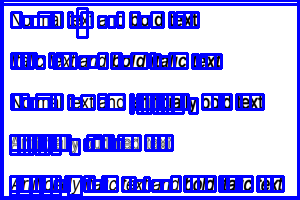

In [ ]:
# drawing rectange
img =cv2.imread('sample.png')
h,w,c = image.shape
# retrieves the bounding boxes around characters or objects in the image using Tesseract's image_to_boxes function, which returns the coordinates and other information of each bounding box
boxes = pytesseract.image_to_boxes(img)
#For each bounding box, it splits the information into separate components (character, x-coordinate of the left-bottom corner, y-coordinate of the left-bottom corner, x-coordinate of the right-top corner, y-coordinate of the right-top corner, and other information).
for b in boxes.splitlines():
  b = b.split(' ')
  # draws a rectangle around each detected object using OpenCV's cv2.rectangle function. The coordinates of the rectangle are based on the information extracted from the bounding box. The color of the rectangle is green (0, 255, 0), and the thickness of the border is 2 pixels.
  img = cv2.rectangle(img, (int(b[1]), h - int(b[2])),(int(b[3]), h - int(b[4])),(0,0,255),2)

Image.fromarray(img)

In [ ]:
# Read the image
img = cv2.imread('sample.png')

# Use Tesseract to detect patterns or words and their bounding boxes
d = pytesseract.image_to_data(img, output_type=pytesseract.Output.DICT)

# Get the keys from the dictionary
keys = list(d.keys())

# Define the pattern or word to search for
pattern = 'artificially'

# Loop through all detected patterns or words
for i in range(len(d['text'])):
    # Check if confidence score is greater than 60 (threshold for reliable detection)
    if int(d['conf'][i]) > 60:
        # Check if the detected text matches the pattern
        if re.search(pattern, d['text'][i], flags=re.IGNORECASE):
            # Get the coordinates of the bounding box
            x, y, w, h = d['left'][i], d['top'][i], d['width'][i], d['height'][i]
            # Draw a rectangle around the detected pattern or word
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Convert the modified image to a PIL Image object for display
result_image = Image.fromarray(img)

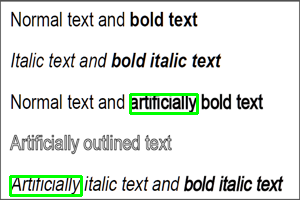

In [ ]:
result_image